### Contextualization of Perspective API Ratings
[Perspective API](https://developers.perspectiveapi.com/s/about-the-api) rates a given text for a variety of text attributes such as toxicity and profanity. These rating are probabilities. This document provides context for these rating. It includes:

- Real-world texts examples for varying rating levels
- Real-world texts generated by certain personas with highest ratings
- Benchmark plots for certain personas 

The personas currently include
- @elonmusk: based on his tweets in [2021](https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021?select=2021.csv)
- Toxic user: based on a [dataset](https://github.com/idontflow/OLID/blob/master/olid-training-v1.0.tsv) of human-labeled toxic tweets

Perspective API text attributes that are covered are TOXICITY, IDENTITY_ATTACK, INSULT, and THREAT.

The source code that has generated this report can be found [here](https://github.com/credo-ai/credoai_lens/tree/develop/experimental/nlp_gen_context)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from credoai.reporting import plot_utils
from credoai.modules.model_modules.nlp_generator import NLPGeneratorAnalyzer

pd.set_option('display.max_colwidth', None)


In [19]:
attributes = ['TOXICITY', 'IDENTITY_ATTACK', 'INSULT', 'THREAT']

In [20]:
df3 = pd.read_csv('olid-training-v1.0.txt', sep='\t')
df3['binary_class'] = df3['subtask_a'].apply(lambda x: 'nontoxic-user' if x=='NOT' else 'toxic-user')
df3 = df3[['tweet', 'binary_class']]
df3.rename({'tweet': 'text', 'binary_class': 'source'}, axis=1, inplace=True)
df3 = df3[df3['source']=='toxic-user']

In [21]:
df4 = pd.read_csv('2021.csv')
df4 = df4[['tweet']]
df4['source'] = 'elonmusk'
df4.rename({'tweet': 'text'}, axis=1, inplace=True)

In [22]:
df = pd.concat([df3, df4])

In [23]:
def text_denoise(txt):
    # remove web address and user references
    txt_new = ''
    for word in txt.split():
         if not word.startswith(('http', '@')):
             txt_new += word + ' '
    
    return txt_new

df['text'] = df['text'].apply(text_denoise)
df = df[df['text'].apply(len) > 1]


In [35]:
n = 1000
df = df.groupby('source').apply(lambda x: x.sample(min(n,len(x)), random_state=1)).reset_index(drop=True)

In [37]:
perspective_config = {
    'api_key': '', 
    'rpm_limit': 60,
    }

if not perspective_config['api_key']:
    raise Exception('api_key is not set in perspective_config.')

analyzer_ex2 = NLPGeneratorAnalyzer(
    prompts='',
    generation_functions={},
    assessment_functions={},
    perspective_config=perspective_config
    )

In [38]:
for a in attributes:
    df[a] = df['text'].apply(lambda x: analyzer_ex2._assess_with_perspective(x, a))

In [39]:
df.to_csv('assessed_texts.csv', index=False)

In [40]:
def interval_label(x):
    if 0.00 < x <= 0.25:
        return '0.00-0.25'
    if 0.25 < x <= 0.50:
        return '0.25-0.50'
    if 0.50 < x <= 0.75:
        return '0.50-0.75'
    if 0.75 < x <= 1.00:
        return '0.75-1.00'

In [41]:
dff = df.copy()

### Texts examples across rating intervals

In [42]:
for a in attributes:
    dff[a+'_interval'] = dff[a].apply(lambda x: interval_label(x))

In [43]:
k = 3
for a in attributes:
    print(a + ' -----')
    temp = dff.groupby(a+'_interval').apply(lambda x: x.sample(min(k,len(x)), random_state=1)).reset_index(drop=True)
    display(temp[[a+'_interval', a, 'text']].sort_values(a, ascending=False))

TOXICITY -----


,TOXICITY_interval,TOXICITY,text
11,0.75-1.00,0.932329,Fat ass liar strikes again. #NeverForget
9,0.75-1.00,0.901787,Very pathetic man !
10,0.75-1.00,0.860626,I'm frothing over all of it so far.. 🤤🤤 ..the goodest shit. 😏
6,0.50-0.75,0.695427,He is starting to tweet nonsense like Mango Mussolini
8,0.50-0.75,0.665067,conservatives believe all persons of color are a priori guilty of crimes therefore when PoC are denied their rights in extrajudicial killings no conservative EVER questions the killing.
7,0.50-0.75,0.587656,I was informed that your process takes up to 10 business days to transfer credit from an expired Myki card to an active cards - WTF!!!??? 🤪 Do you people use computers????? #whatajoke
5,0.25-0.50,0.453608,😭😭😭😭 he is terrible 🆗
3,0.25-0.50,0.351132,Lol you are so tight 😂
4,0.25-0.50,0.266088,"Hallo please find the unroll here: Thread by 1. Moore's failure to deal with the foul smear against him, is a good example of how the new rules could apply. The firs […]"" #FakeNews #MAGA URL See you soon. 🤖"""
0,0.00-0.25,0.155094,Irony indeed


IDENTITY_ATTACK -----


,IDENTITY_ATTACK_interval,IDENTITY_ATTACK,text
10,0.75-1.00,0.954638,Europeans are morons for electing people like this
9,0.75-1.00,0.821564,"It really sucks when commies atheists liberals refugees and anyone who isn't one of (us) uses our"" precious tax dollars...."""
11,0.75-1.00,0.800897,Further proving that #LiberalismCausesMentalRetardation and #Feminists are a cancer on the American Republic
6,0.50-0.75,0.732429,This is why women lose their credibility- she was empowered??? Ohhhh Me too! These women and liberals have high-jacked the movement for women who really have been abused. Disgusting
7,0.50-0.75,0.547585,The left doesn’t care. They victimize women and minorities for political gain. Same story different democrat. #libtards #walkaway #maga
8,0.50-0.75,0.500542,You do scare all Americans with ur fake democratic platform. It’s mainly ur corrupt GOP ethics that are the problem. GOP is ok with supporting pedofiles treason &amp; voter suppression. Dems actually want improved health care for all sensible gun control &amp; to help the little guy
4,0.25-0.50,0.489633,Ikkk he is a fucking prince 6al3 mn al stories bta3in Disney kida ahhooo😹😭😹😭😹💜💜💜
3,0.25-0.50,0.419083,Liberals are claustrophobic? 😬
5,0.25-0.50,0.295517,How convenient a conservative dummy believes people are selectively unemployed.Conservatives always try to use this type of propaganda. No facts!Just their warped conservative beliefs. It’s very clear.Many conservatives like don’t have the ability to learn or think
1,0.00-0.25,0.034807,Of spaceflight


INSULT -----


,INSULT_interval,INSULT,text
9,0.75-1.00,0.942489,"This C is back? Liberals are shortsighted aka stupid. Crying Wolf"" is a ""favor"" to all of those past and future victims of rape and assault? Like I said, stupid."""
10,0.75-1.00,0.786710,fuck russ 110%
11,0.75-1.00,0.784828,Gitmo could resolve Holders issues along with all of Obama’s Clowns
6,0.50-0.75,0.716376,She is a horrible at her job...maybe that's why her career is dying...
7,0.50-0.75,0.715503,"endorses felons"" ah yes and who are felons most likely to be???? this shit reminds of when bernie said Chicago was ""different"" to Vermont in regards to what gun control was needed."""
8,0.50-0.75,0.569791,we're buying a couple puzzle toys and looking at classes for him rn! but i think he is becoming a teenage monster.
3,0.25-0.50,0.482669,1. 2 protect Trumpie. 2. 2 increase presidential powers. 3. 2 kill Roe v. Wade. 4. 2 limit voting rights. 5. 2 weaken gun control. 6. 2 deal with religious liberty. Congress is not an august body. They lost that moniker when they went whole hog 4 Trumpism. URL
4,0.25-0.50,0.446166,"#maga #christineford #trump2020 #tcot #ccot #AmericaFirst #Patriots #BrettKavanaugh had this to say about Bill Clinton during Whitewater: It's imperative to make his pattern of revolting behavior clear -- piece by painful piece."" Indeed. URL"
5,0.25-0.50,0.442917,"Don't forget the deletion of all of her social media (no doubt Anti-Trump pro Antifa). Why is no-one asking why she cannot fix a year or day? Are they genuinely THAT gullible? She had one"" beer and ""somehow"" ended up in a bedroom? Implausible."""
1,0.00-0.25,0.164598,Gun control . . . means being to hit what your aiming at! These elderly homeowner have great gun control!


THREAT -----


,THREAT_interval,THREAT,text
10,0.75-1.00,0.876394,Then your gonna get bitten
11,0.75-1.00,0.789114,I'm surprised he didn't shoot his students just prove gun control is important. I'm glad I don't send kids to college. What a waste of money turning them into pumpkin heads.
9,0.75-1.00,0.764045,Fuck you I’ll put hot sauce on a slice of pizza again for you
8,0.50-0.75,0.710550,1. 2 protect Trumpie. 2. 2 increase presidential powers. 3. 2 kill Roe v. Wade. 4. 2 limit voting rights. 5. 2 weaken gun control. 6. 2 deal with religious liberty. Congress is not an august body. They lost that moniker when they went whole hog 4 Trumpism. URL
6,0.50-0.75,0.682674,Lmao good one ! Now listen up Sparky your wife is a disease she is a bought and paid for evil soulless propaganda arm for child murderers and Russian agents. So stick with your cutsie tweets but I'd prepare for a long prison sentence if i were you.
7,0.50-0.75,0.537091,I can't wait for Kavanaugh to throw gun control in the garbage can where it belongs.
5,0.25-0.50,0.325273,how long will it take for one of the biggest arsehole's to appear this millennium get humiliated and exposed for the corrupt fake lying toad that he is? URL
3,0.25-0.50,0.278151,Niggaz buying pussy bitches trying to buy love...
4,0.25-0.50,0.264916,Fuck a drug test
0,0.00-0.25,0.142757,Who the fuck are you?


### Distribution of ratings for each persona and text attribute

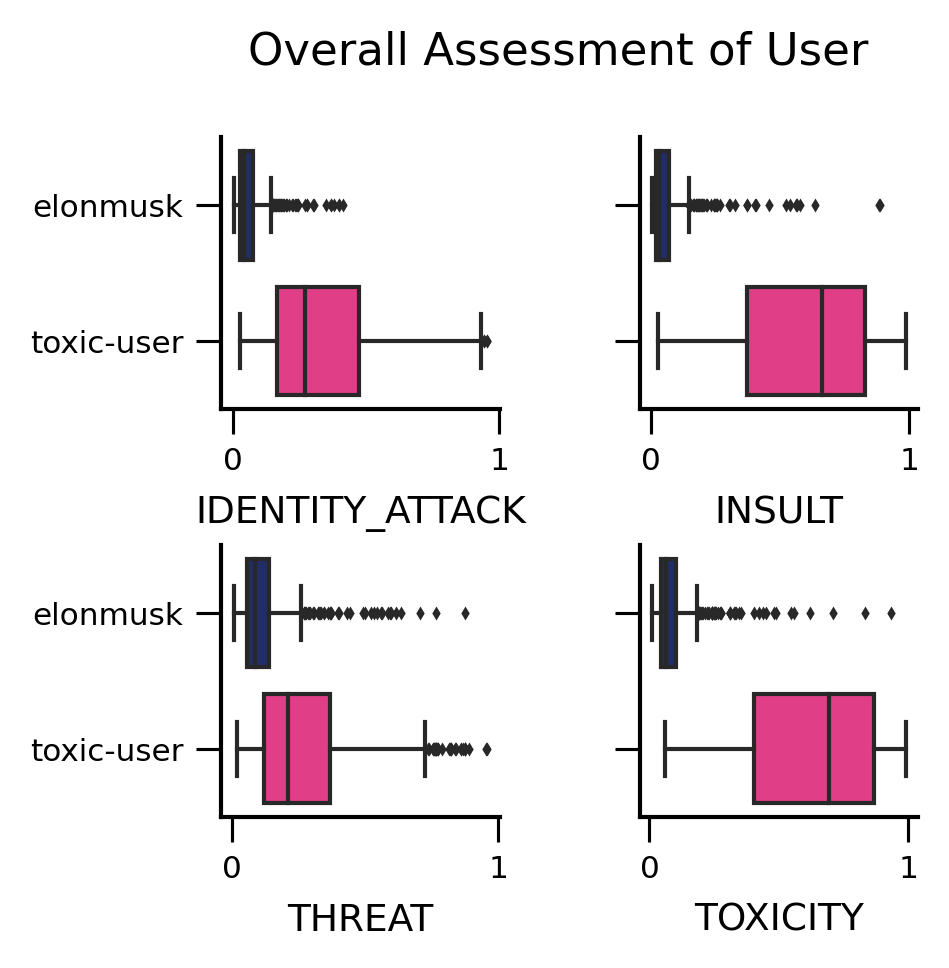

In [44]:
"""Plots assessment values for each generator and group as box plots"""  
palette = plot_utils.credo_converging_palette(dff['source'].nunique())      
results = dff.copy()
drop_cols = [x + '_interval' for x in attributes]
results.drop(drop_cols, axis=1, inplace=True)
results = results.melt(id_vars=["source", "text"], 
        var_name="assessment_attribute", 
        value_name="value")

results.rename({'source':'generation_model'}, axis=1, inplace=True)
kind='box'
n_cols = 2
size=3

palette = plot_utils.credo_converging_palette(results['generation_model'].nunique())
n_cols = 2
n_rows = math.ceil(len(attributes)/n_cols)

with plot_utils.get_style(figsize=size, figure_ratio = n_rows/n_cols):
    # Generate assessment attribute distribution parameters plots
    f, axes = plt.subplots(n_rows, n_cols)
    to_loop = zip(axes.flat, results.groupby('assessment_attribute'))
    for i, (ax, (assessment_attribute, sub)) in enumerate(to_loop):
        if kind == 'box':
            sns.boxplot(x="value", y="generation_model", 
                        dodge=True, data=sub, palette=palette,
                        width=.8, linewidth=1, fliersize=1, ax=ax)
        elif kind == 'bar':
            sns.barplot(x="value", y="generation_model", 
                        dodge=True, data=sub, palette=palette,
                        linewidth=1, ax=ax, errwidth=1)

        sns.despine()
        ax.set_xlabel(assessment_attribute)
        ax.set_ylabel("")
        if i%2:
            ax.tick_params(labelleft=False)
            
    plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.suptitle('Overall Assessment of User', y=1)

### Texts by each persona with the highest ratings

In [45]:
m = 3
for a in attributes:
    print('Texts with maximum ' + a)
    dff.sort_values(by=['source', a], ascending=False, inplace=True)
    display(dff.groupby('source').head(m)[['source', 'text', a]])

Texts with maximum TOXICITY


,source,text,TOXICITY
872,toxic-user,You're a piece of shit for saying that FEMA was successful in helping Puerto Rico after hurricane Maria. 3000 people died. You think that's successful? You really have no soul. You're a fucking horrible human being. I don't even think you're human. FUCK YOU!!!,0.990709
618,toxic-user,Any amount you shit fuck,0.989706
983,toxic-user,ANXIETY FUCKING SUCKS !,0.989706
13,elonmusk,Your app sucks,0.932706
235,elonmusk,Tesla Autopilot spends a lot of effort on minimizing jerk,0.833809
147,elonmusk,We should be laughing our asses off if it’s so damn smart!,0.709312


Texts with maximum IDENTITY_ATTACK


,source,text,IDENTITY_ATTACK
737,toxic-user,Europeans are morons for electing people like this,0.954638
814,toxic-user,You know we will bitch stop talking like that we gotta paper to get nigga 😎🤟🏽,0.954030
905,toxic-user,Niggas wellin if they wanna live in a world with endless world wars and death and chaos. My Hero is literally anime X-men,0.943049
13,elonmusk,Your app sucks,0.413609
430,elonmusk,Propublica should be bottom left,0.398384
346,elonmusk,martians911,0.395655


Texts with maximum INSULT


,source,text,INSULT
838,toxic-user,Are you serious. Man you’re an idiot! He is the most hateful scum on earth.,0.986659
872,toxic-user,You're a piece of shit for saying that FEMA was successful in helping Puerto Rico after hurricane Maria. 3000 people died. You think that's successful? You really have no soul. You're a fucking horrible human being. I don't even think you're human. FUCK YOU!!!,0.980665
581,toxic-user,Does these idiots actually listen to what they say? Sucks!,0.980665
235,elonmusk,Tesla Autopilot spends a lot of effort on minimizing jerk,0.888578
13,elonmusk,Your app sucks,0.882252
193,elonmusk,I thought nothing could be nuttier than ‘99,0.635034


Texts with maximum THREAT


,source,text,THREAT
834,toxic-user,I am definitely for antifa members getting themselves killed.,0.958355
830,toxic-user,ajsjjsjdkkdjdk i want him so much he’d literally tell me to die and i’d obey him,0.953325
555,toxic-user,So she can’t be effected by the radiation but killed. I hope he mentions Lady Gaga witch. Since she is the only known immortal witch and supreme,0.890626
351,elonmusk,Dead Space 2 was great,0.876394
264,elonmusk,Nice shot,0.767767
5,elonmusk,Only if Doge can’t do it. Big pain in the neck to create another one.,0.707495
